<p style="font-family: Arial; font-size:3.95em;color:green; font-style:bold"><br>
Intelligent Data Analysis</p><br>

## Dataset \#79
Pavol Grofčík  
Dennis Sobolev

In [49]:
#Import knižníc 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hl
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

### Dataset Personal_train.csv

Najprv preskúmame dataset s názvom `Personal_train.csv`, pretože obsahuje pomerne menej dát a zobrazíme si zistené hodnoty pomocou deskriptívnej štatistky a pomocné vizualizácie.

In [50]:
path = "./Datasets/personal_train.csv"

In [51]:
df_personal = pd.read_csv(path, names = ["Name", "Address", "Age", "Sex", "Date_of_Birth"])
df_personal = df_personal.drop(df_personal.index[0])
df_personal.head()

,Name,Address,Age,Sex,Date_of_Birth
0.0,Terry Terry,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",68.0,M,1949-11-16
1.0,Edith Boudreaux,"PSC 4657, Box 5446\nAPO AP 58412",75.0,F,1943-08-10
2.0,Stephen Lalk,Unit 9759 Box 9470\nDPO AP 45549,67.0,M,1951-05-28
3.0,Abraham Bruce,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",34.0,?,1984-02-13
4.0,Janet Washington,"995 Frank Stravenue\nSouth Matthewport, TX 81402",65.0,F,1953/06/24


In [52]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2237 entries, 0.0 to 2236.0
Data columns (total 5 columns):
Name             2237 non-null object
Address          2237 non-null object
Age              2236 non-null object
Sex              2237 non-null object
Date_of_Birth    2236 non-null object
dtypes: object(5)
memory usage: 104.9+ KB


In [ ]:
df_personal.dtypes

In [53]:
df_personal.shape

(2237, 5)

In [54]:
#Počet NULL values v stĺpci Age
sum(df_personal.Age.isnull())

1

### Analýza po jednotlivých stĺpcoch

In [55]:
data = pd.to_numeric(df_personal.Age,downcast="integer")
data.describe()

count    2236.000000
mean       51.822004
std        20.884439
min         1.000000
25%        36.000000
50%        54.000000
75%        67.000000
max       455.000000
Name: Age, dtype: float64

### Chyba 1-2
- **_Age_** vychýlené hodnoty  
- **_Date__of__Birth_** - neplatná hodnota

In [56]:
#Out of range hodnoty
df_personal.iloc[1821]

Name                                    Stephanie Patterson
Address          475 Johnny Courts\nLake Lawrence, IA 72418
Age                                                   455.0
Sex                                                       F
Date_of_Birth                                    1563-02-07
Name: 1821.0, dtype: object

In [ ]:
#Duplicity mien - "Terry Murphy"
df_personal.Name.astype(dtype=str)
df_personal.Name.value_counts().head()

### Chyba 3
- **_Date_of_Birth_** rôzny formát dátumov

In [58]:
#Rôzny formát dátumov + datetime
df_personal.Date_of_Birth.tail(10)

2227.0               58-11-29
2228.0             1968-11-27
2229.0    1945-04-29 00 00 00
2230.0             1976-08-11
2231.0    1995-06-10 00:00:00
2232.0               60-05-28
2233.0             1981-08-29
2234.0             1989-04-02
2235.0             1983-04-01
2236.0             1974-03-19
Name: Date_of_Birth, dtype: object

In [59]:
# Znečistené dáta
df_personal.Sex.value_counts()

F    1448
M     701
?      88
Name: Sex, dtype: int64

## Dataset Other_train.csv

In [4]:
#Načítanie path k datasetu
!pwd
!ls -lh
path2 = "./Datasets/other_train.csv"

/home/pavol/Plocha/INANU
total 6,9M
-rw-r--r-- 1 pavol pavol  16K okt 25 22:30  Analysis.ipynb
-rw-r--r-- 1 pavol pavol  46K okt 25 22:30 'Analysis - other.ipynb'
-rw-r--r-- 1 pavol pavol 179K okt 25 22:21  Data_Analysis.ipynb
drwxr-xr-x 2 pavol pavol 4,0K okt 25 22:30  Datasets
-rw-r--r-- 1 pavol pavol 1,4K okt 25 22:30  Errors.txt
-rw-r--r-- 1 pavol pavol 6,6M okt 25 22:30  PythonGraphs.ipynb
-rw-r--r-- 1 pavol pavol   62 okt 25 22:30  README.md


In [60]:
pd_other = pd.read_csv(path2,index_col=0)
pd_other.head()

,name,address,query hyperthyroid,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
0,John Kasprzak,"3856 Kayla Track\nLake Sara, HI 31241",f,t,HS-grad,f,118.0,1.42,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Craft-repair,f,?,White,83
1,Stephen Harvey,"34782 Kayla Field\nSarahmouth, VT 75984",f,t,HS-grad,f,112.0,1.03,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",FALSE,other,-900.0,Adm-clerical,f,?,White,109
2,Paul Moe,USNV Mooney\nFPO AE 29375,f,t,Some-college,f,87.0,0.96,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,10.0,Other-service,f,?,White,90
3,Sarah Johnson,"3633 Bryan Isle\nNorth Jamesshire, HI 69484",f,t,Doctorate,f,102.0,0.85,0.0,0.0,...,f,"{'query hypothyroid':'t','T4U measured':'t','p...",f,SVI,16.0,Prof-specialty,f,?,White,119
4,Stacy Martinson,"65701 Choi Course Apt. 280\nNorth Williamton, ...",f,t,Some-college,f,129.0,0.97,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",F,SVI,10.0,Other-service,f,?,White,133


In [ ]:
len(pd_other.columns)

In [ ]:
pd_other.dtypes

In [61]:
#Null hodnoty
pd_other.isnull().sum()

name                           0
address                        0
query hyperthyroid            10
FTI measured                   9
education                      7
lithium                       10
TT4                          162
T4U                          245
capital-loss                 238
capital-gain                   5
tumor                         10
TSH                          247
T3                           482
fnlwgt                         8
hours-per-week                 9
relationship                   9
sick                          10
workclass                    147
TT4 measured                   9
class                          8
marital-status                10
goitre                         8
native-country                 6
hypopituitary                  8
medical_info                  10
on antithyroid medication      9
referral source               11
education-num                 10
occupation                    13
TBG measured                   7
TBG       

## Chyba 4
- **education-num** záporné hodnoty

In [62]:
pd_other["education-num"].describe()

count    2277.000000
mean        8.742644
std       331.789219
min     -1600.000000
25%         9.000000
50%        10.000000
75%        12.000000
max      1400.000000
Name: education-num, dtype: float64

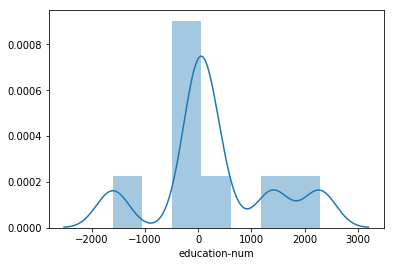

In [64]:
#Napísať vždy koncept riešenia - akým spôsobom bude nasleodovať preprocessing
sns.distplot(pd_other["education-num"].describe())

Z distribúcie hodnôt môžno vidieť aj záporné hodnoty, ktoré sú neočakávané pri education-num

## Chyba 5 
- **capital-gain** vysoká varianca hodnôt

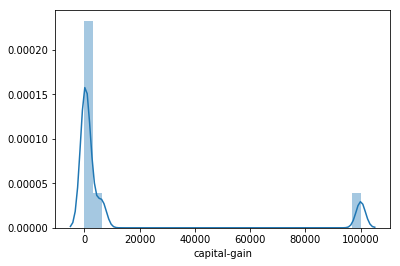

In [65]:
sns.distplot(pd_other["capital-gain"].describe())

## Chyba 6
- **on antithyroid medication** Nesprávny formát: f, F, FALSE, f.2  ...

In [66]:
pd_other["on antithyroid medication"].unique()

array(['f', 'FALSE', 'F', 'f.2', nan, 'T', 't', 'TRUE'], dtype=object)

## Chyba 7
- **medical_info** json formát

In [67]:
pd_other["medical_info"].head()

0    {'query hypothyroid':'f','T4U measured':'t','p...
1    {'query hypothyroid':'f','T4U measured':'t','p...
2    {'query hypothyroid':'f','T4U measured':'t','p...
3    {'query hypothyroid':'t','T4U measured':'t','p...
4    {'query hypothyroid':'f','T4U measured':'t','p...
Name: medical_info, dtype: object

## Chyba 8
- **workclass** nesprávny formát + whitespace ?, ??

In [68]:
pd_other["workclass"].unique()

array([' Private', nan, '??', ' ?', ' Self-emp-not-inc', ' Local-gov',
       ' State-gov', ' Self-emp-inc', 'federal-gov', 'private',
       ' Federal-gov', 'local-gov', '?', 'self-emp-not-inc', 'Nan',
       'state-gov', 'self-emp-inc', ' Without-pay'], dtype=object)

## Chyba 9
- **class** nesprávny formát: negative.| , negative._

In [69]:
pd_other["class"].value_counts().head(10)

negative.|2871    2
negative._1111    2
negative.|3256    2
negative.|2506    2
negative.|1535    2
negative._379     2
negative.|1433    2
negative.|3569    2
negative.|2219    2
negative.|2688    2
Name: class, dtype: int64

## Chyba 10
- **on antithyroid medication** nesprávny formát: f, FALSE, F, f.2, T, t, TRUE ...

In [70]:
pd_other["on antithyroid medication"].unique()

array(['f', 'FALSE', 'F', 'f.2', nan, 'T', 't', 'TRUE'], dtype=object)

## Ďalšie zaujímavé zistenia

In [1]:
#Other hodnota - prilíš veľká početnost
pd_other["referral source"].value_counts()

NameError: name 'pd_other' is not defined

In [ ]:
#Duplikácia mien
pd_other["name"].value_counts().head(10)

In [ ]:
#Celý stĺpec obsahuje iba ? hodnoty
pd_other["TBG"].value_counts()

In [ ]:
#Nesprávny formát - whitespace pred marital_status
pd_other.relationship.unique()

In [ ]:
#Podobnosť so stĺpcom relationships, Married-...
pd_other["marital-status"].unique()

In [ ]:
#Zvláštne hodnoty - t.4 ???
pd_other["FTI measured"].unique()

In [ ]:
#Vysoká variancia hodnôt pre stĺpec FTI
tmp = pd_other.FTI
tmp = tmp.apply(pd.to_numeric, errors='coerce').dropna()
tmp = tmp.describe()
sns.distplot(tmp)

In [ ]:
pd.scatter_matrix(pd_other, figsize = (40, 40))
plt.show()

Duplicitné hodnoty s rovnakými/rôznymi adresami

## Hormóny - tyreotropín
**TSH** - stimuluje výrobu iných hormónov v štítnej žľaze - T3/T4  
Ak **T4** je nedostatok -TSH sa zvýši  
Nízky stupeň T4 vs autoimúnny -> imunitný systém zabraňuje produkcie T4  

Delí sa na dve skupiny T4U - unboud
TT4 - total tyreotropín

T3 analýza sa uskutočnuje po TSH a TT4, pretože TT4 sa dá sekundárne transformovať na T3 => málo signifikatná

TBG - ignorujeme, pretože obsahuje prázdny

***Tumor***  výsledok hypoprodukcie alebo ***goitre***(med. struna/hrvoľ)

Poruchy štítnej žľazy
>**increased** - hyperfunkcia  
>**decreased** - hypofunkcia  

*On anthyroid medication* - medikanty proti tvorbe hormónov štítnej žlazy


### Splitting the class column into 2 

In [71]:
pd_other["class"] = pd_other["class"].str.replace("_","")
pd_other["class"] = pd_other["class"].str.replace("|", "")
pd_other["class"].head()

0    increased binding protein.2384
1                      negative.358
2                     negative.1247
3                     negative.1829
4                     negative.3531
Name: class, dtype: object

In [72]:
pd_other[["class", "class_protein"]] = pd_other["class"].str.split(".",expand = True)

In [73]:
pd_other[["class", "class_protein"]].head(10)

,class,class_protein
0,increased binding protein,2384
1,negative,358
2,negative,1247
3,negative,1829
4,negative,3531
5,negative,2179
6,negative,2651
7,negative,3111
8,negative,3738
9,negative,2001


In [ ]:
pd_other.columns

In [ ]:
x = pd_other["sick"].isna().dropna()
x.unique()

In [ ]:
pd_other["hours-per-week"].isna().dropna()

In [ ]:
pd_other.race.isna().dropna()


In [34]:
pd_other = pd_other.drop(index=102)

# Pairplots of hormones Thyroid disease

Text(0.5, 1.0, 'Hormone TSH vs T4U Correlation')

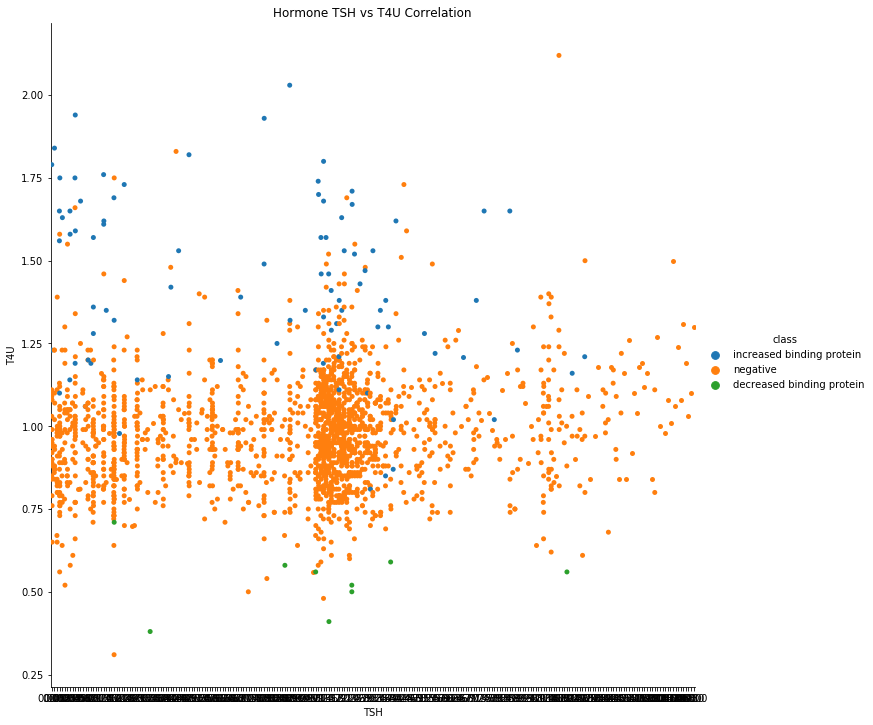

In [7]:
sns.catplot(x="TSH",y="T4U",hue="class",data=pd_other, height=10)
plt.title("Hormone TSH vs T4U Correlation")

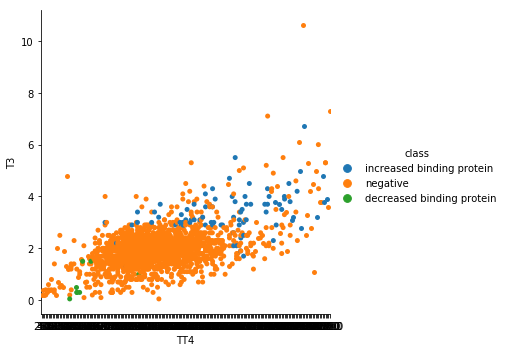

In [35]:
sns.catplot(x="TT4", y = "T3", hue="class", data=pd_other)

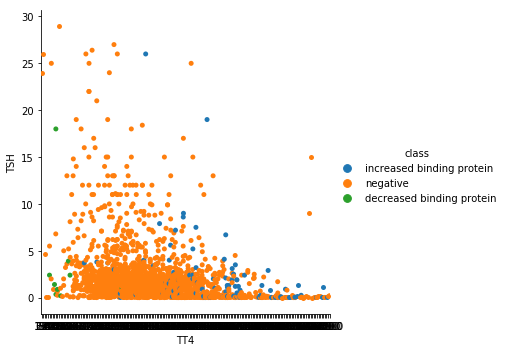

In [48]:
sns.catplot(x="TT4", y = "TSH", hue="class", data=pd_other[pd_other["TSH"] < 30])

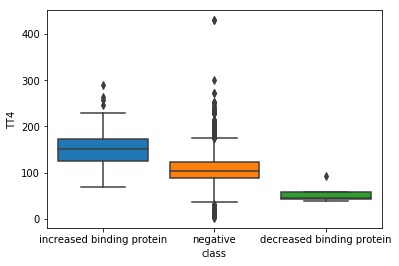

In [20]:
sns.boxplot(x="class", y = "TT4", data=pd_other,saturation=True)

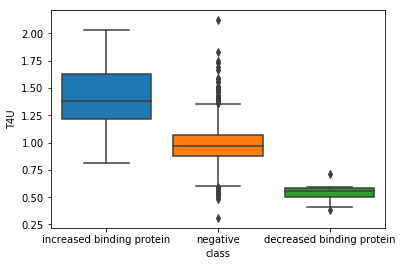

In [21]:
sns.boxplot(x="class", y = "T4U", data=pd_other,saturation=True)

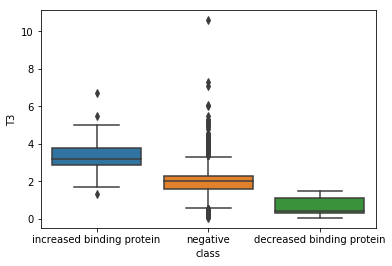

In [19]:
sns.boxplot(x="class", y = "T3", data=pd_other)

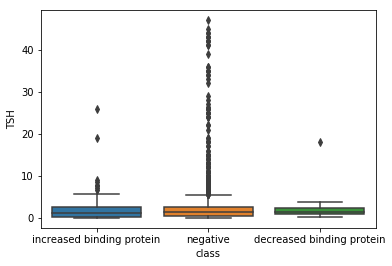

In [37]:
sns.boxplot(x="class", y = pd_other[pd_other["TSH"]<50]["TSH"] , data=pd_other)

## Goitre correlation

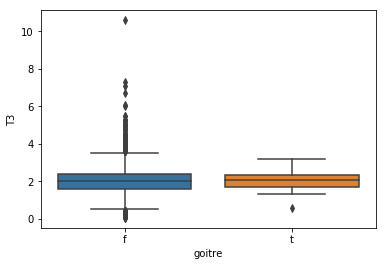

In [36]:
sns.boxplot(x="goitre", y = "T3", data=pd_other)

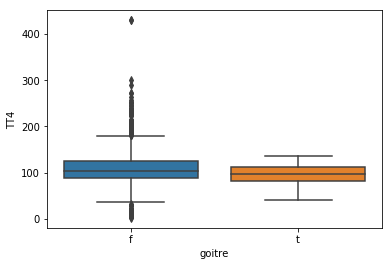

In [38]:
sns.boxplot(x="goitre", y = "TT4", data=pd_other)

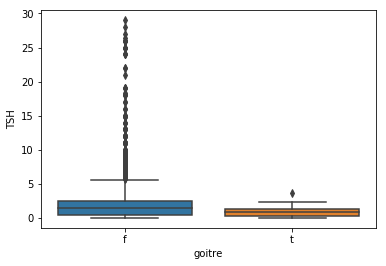

In [39]:
sns.boxplot(x="goitre", y = pd_other[pd_other.TSH < 30].TSH, data=pd_other)

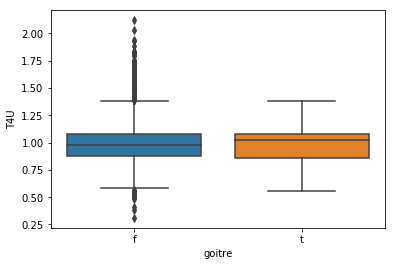

In [40]:
sns.boxplot(x="goitre", y = "T4U", data=pd_other)

## Tumor correlation

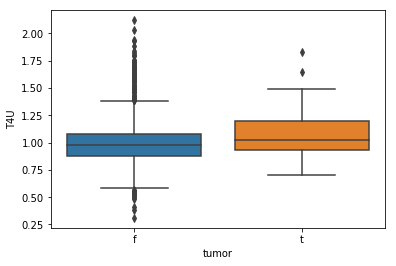

In [41]:
sns.boxplot(x="tumor",y="T4U", data=pd_other)

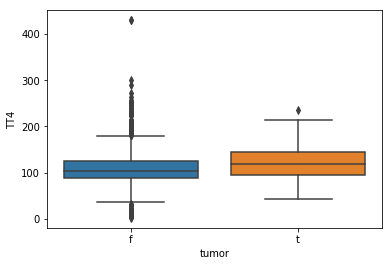

In [43]:
sns.boxplot(x="tumor",y="TT4", data=pd_other)

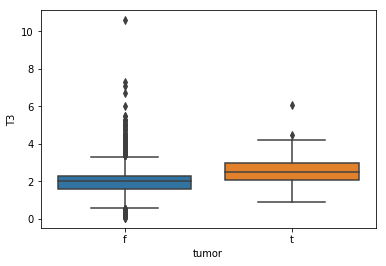

In [44]:
sns.boxplot(x="tumor",y="T3", data=pd_other)

### Heatmap


Text(0.5, 1.0, 'Correlation of Hormones')

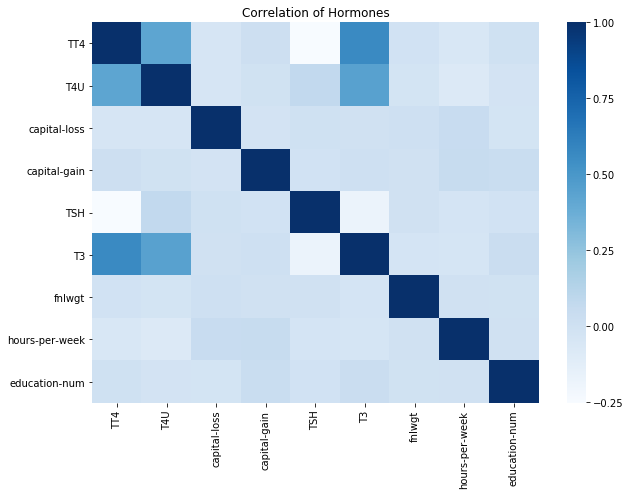

In [25]:
corr = pd_other.select_dtypes(exclude="object").corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,cmap="Blues")
plt.title("Correlation of Hormones")


# Analýza korelácií

Z mapy je jasné, že korelujú hormóny **TSH, TT4, T4U, T3**  

Zaujímavé je že **klesajúca hodnota hormónu T4 je príčinou rastu TSH**, čo je z medicinálneho pohľadu pravdou, pretože hormón TSH je riadiaci hormón produkovaný hypofýzou, ktorý sa produkuje za podmienku že hladina hormónov T4 a T4 je buď nízka alebo vysoká  

Z nášho datasetu je hodnota T4 nízka, čiže hypofýza produkuje TSH, aby zvýšil množstvo hormónu T4

Eventuálne, je aj nepriama korelácia pre hormón **T3**, ktorý stimuluje produkciu TSH, hypofýzou, T3 pochádza z ***dejodizáciou hormónu T4***

Ďalšou znalosťou je vysoká koncentrácia hormónov T3 je dobrá na **meranie hypertyroidu**.

Hormón **T3** sa môže *znížiť* ako dôsledok:  
>**Deficit Jódu**  
>**I131 - rádioaktívna liečba nuklidom prvku I 131**   
>**Neurová Anorexia**
>**Hypotyreóza**  

Príčiny *zvýšenia* **T3**  
>**Disfunkcia štítnej žľazy po tehotenstve**  
>**Tumor štítnej žľazy**  
>**Goitre - zvýšenie veľkosti štítnej žľazy**

## Analýza hormónu T4

Hormón **T4U** zvýšený:  
>**Goitre**  
>**Tyrióza**  
>**Dysfunckia štítnej žľazy po tehotenstve**

Príčiny zníženia:  
>**Začiatočná hypoterióza**  
>**Autoimúnna tyrióza**  
>**Deficit Jódu**  
>**Goitre**


Uviesť zdroje + lekárske zistenia!!!